In [5]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
from sklearn import svm
from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score 
import pandas as pd
from itertools import combinations

In [6]:
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [7]:
df=pd.read_csv("dataset.csv",low_memory=False)

In [8]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [5]:
#Split the data into training and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
#y_train=y_train.to_numpy()
#y_test=y_test.to_numpy()

In [6]:
C_lst=[5,10,15,20,25]
train_score=[]
test_score=[]
for c in C_lst:
    predictor = svm.SVC(C=c, max_iter=10000, kernel='rbf')
    predictor.fit(X_train, y_train)
    train_score.append(predictor.score(X_train,y_train))
    test_score.append(predictor.score(X_test,y_test))

In [7]:
train_score

[0.8367952522255193,
 0.847875720020946,
 0.850877989177867,
 0.8517228137545819,
 0.8552417524873451]

In [8]:
test_score

[0.8376481923673076,
 0.8484143940346026,
 0.8511164174102468,
 0.8525197938921704,
 0.8545934397385949]

In [9]:
scaler=preprocessing.StandardScaler()
#scaler=preprocessing.RobustScaler()
#scaler=preprocessing.MinMaxScaler()
X_scale=scaler.fit_transform(X)

In [10]:
#Split the data into training and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.25,random_state=42)

In [11]:
C_lst=[5,10,15,20,25]
train_scale_score=[]
test_scale_score=[]
for c in C_lst:
    predictor = svm.SVC(C=c, max_iter=10000, kernel='rbf')
    predictor.fit(X_train, y_train)
    train_scale_score.append(predictor.score(X_train,y_train))
    test_scale_score.append(predictor.score(X_test,y_test))

In [12]:
print(train_scale_score,test_scale_score)

[0.8526933147146099, 0.8597521382440216, 0.8676488043288532, 0.866077849537441, 0.8656449642171409] [0.8527083071509363, 0.8589920824431319, 0.86535964140589, 0.8643332914414981, 0.8626995098655272]


In [13]:
new_X=np.square(X)
scaler=preprocessing.StandardScaler()
X_scale=scaler.fit_transform(new_X)
#Split the data into training and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.25,random_state=42)
C_lst=[5,10,15,20,25]
train_scale_2_score=[]
test_scale_2_score=[]
for c in C_lst:
    predictor = svm.SVC(C=c, max_iter=10000, kernel='rbf')
    predictor.fit(X_train, y_train)
    train_scale_2_score.append(predictor.score(X_train,y_train))
    test_scale_2_score.append(predictor.score(X_test,y_test))

In [14]:
print(train_scale_2_score,test_scale_2_score)

[0.8068772909757375, 0.8219026008029324, 0.8391342293593995, 0.8283330424157793, 0.8123511956711468] [0.8076117464706128, 0.822043483725022, 0.837690084202589, 0.8256042897239328, 0.8125549830338067]


In [24]:
new_X=np.sqrt(X)
scaler=preprocessing.StandardScaler()
X_scale=scaler.fit_transform(new_X)
#Split the data into training and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.25,random_state=42)
C_lst=[5,10,15,20,25,30]
train_scale_3_score=[]
test_scale_3_score=[]
for c in C_lst:
    predictor = svm.SVC(C=c, max_iter=10000, kernel='rbf')
    predictor.fit(X_train, y_train)
    train_scale_3_score.append(predictor.score(X_train,y_train))
    test_scale_3_score.append(predictor.score(X_test,y_test))

In [16]:
print(train_scale_3_score,test_scale_3_score)

[0.8568545994065282, 0.8647093733635888, 0.868277186245418, 0.8617629603770292, 0.8709513004014662] [0.8558711407146747, 0.8624691047714801, 0.865904235264547, 0.8593900548783042, 0.8676218005110804]


In [ ]:
plt.plot(C_lst,test_scale_3_score,label="test")
plt.plot(C_lst,train_scale_3_score,label="train")
plt.title("L2 penalty on $\sqrt{X}$")
plt.xlabel("C")
plt.ylabel("prediction accuracy")
plt.legend()
plt.show()

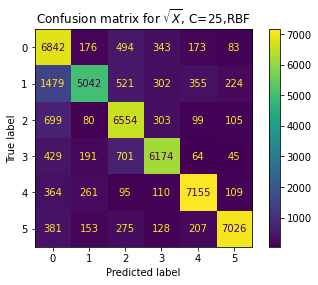

In [5]:
new_X=np.square(X)
scaler=preprocessing.StandardScaler()
X_scale=scaler.fit_transform(new_X)
#Split the data into training and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.25,random_state=42)
model = svm.SVC(C=25, max_iter=10000, kernel='rbf')
model.fit(X_train,y_train)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test) 
plt.title("Confusion matrix for $\sqrt{X}$, C=25,RBF")
plt.show()

In [9]:
scaler=preprocessing.StandardScaler()
X_scale=scaler.fit_transform(X)
#Split the data into training and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.25,random_state=42)
model = svm.SVC(C=25, max_iter=10000, kernel='sigmoid')
model.fit(X_train,y_train)
print(model.score(X_train,y_train))

0.2552347704660499


In [10]:
 scaler=preprocessing.StandardScaler()
X_scale=scaler.fit_transform(X)
#Split the data into training and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.25,random_state=42)
model = svm.SVC(C=15, max_iter=10000, kernel='sigmoid')
model.fit(X_train,y_train)
print(model.score(X_train,y_train))

0.24122883574794904
